Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 784)                 │         101,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.3917 - val_loss: 0.2165
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2025 - val_loss: 0.1765
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1726 - val_loss: 0.1581
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1560 - val_loss: 0.1478
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1475 - val_loss: 0.1416
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1413 - val_loss: 0.1364
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1362 - val_loss: 0.1320
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1313 - val_loss: 0.1276
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1270 - val_loss: 0.1240
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1244 - val_loss: 0.1221
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


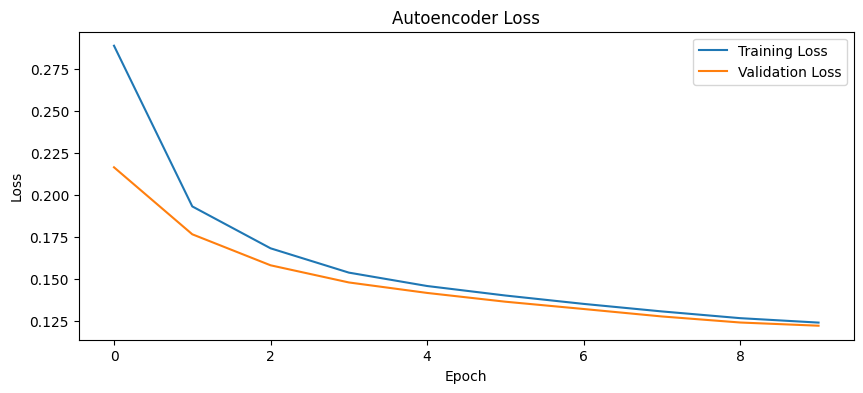

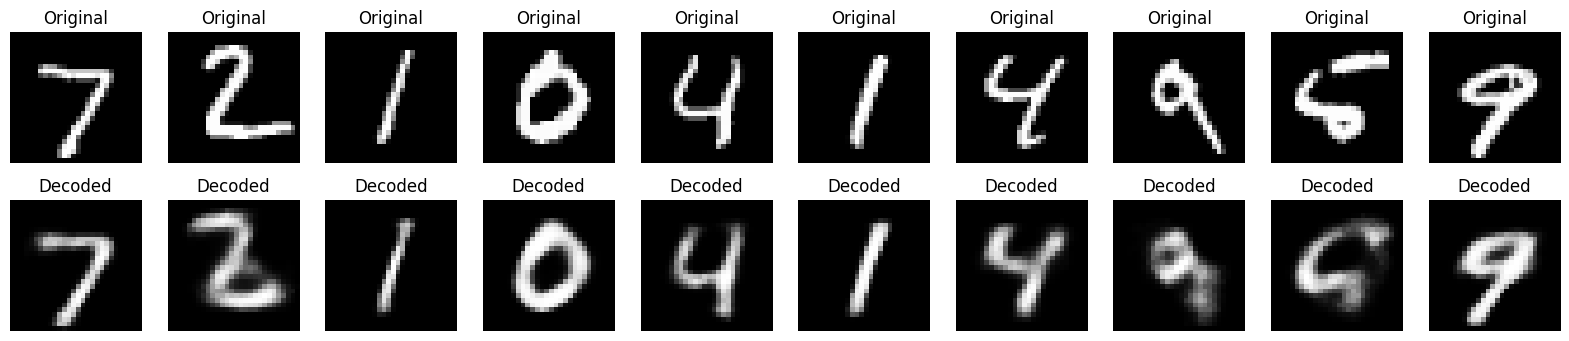

In [4]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Reshape
from keras import regularizers
from keras.optimizers import Adam

# Step 1: Data Collection
# Loading the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Step 2: Data Preprocessing
# Normalize the data to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshaping the data for the network
# Original shape: (samples, 28, 28)
x_train_reshaped = x_train.reshape(len(x_train), 28, 28, 1)
x_test_reshaped = x_test.reshape(len(x_test), 28, 28, 1)

# Step 3: Build the Autoencoder Model
input_img = Input(shape=(28, 28, 1))  # Input layer

# Flatten the input for the dense layers
flat_img = Flatten()(input_img)  # Converts to (28*28) = 784 dimensions

# Encoder
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l2(1e-5))(flat_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # 28*28 = 784 units

# Reshaping the decoded output to match the input shape
decoded_img = Reshape((28, 28, 1))(decoded)

# Autoencoder Model
autoencoder = Model(input_img, decoded_img)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Print model summary
autoencoder.summary()

# Step 4: Train the Autoencoder Model
history = autoencoder.fit(
    x_train_reshaped, x_train_reshaped,
    epochs=10,  # Reduced for faster execution
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_reshaped, x_test_reshaped)
)

# Step 5: Evaluate and Visualize the Results
decoded_imgs = autoencoder.predict(x_test_reshaped)

# Plot the training and validation loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the original and decoded images side by side
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    ax.set_title("Original")
    ax.axis('off')
    
    # Decoded Image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.set_title("Decoded")
    ax.axis('off')
plt.show()